In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

import statsmodels.api as sm

from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from pandas.plotting import lag_plot

In [20]:
#df = pd.read_excel("7th month.xlsx", names=['price','datetime'], header=0 )
df = pd.read_excel("7th month.xlsx",index_col='datetime',parse_dates=True)
#df = df.rename(columns={"datetime": "ndatetime"})
#df["datetime"] = pd.to_datetime(df["datetime"])
#df.head()
# df["datetime"] = pd.to_datetime(df["datetime"])
df.index.freq='1H'
df.index

Index(['2021.07.31 01:00 00+00:00', '2021.07.31 02:00 00+00:00',
       '2021.07.31 03:00 00+00:00', '2021.07.31 04:00 00+00:00',
       '2021.07.31 05:00 00+00:00', '2021.07.31 06:00 00+00:00',
       '2021.07.31 07:00 00+00:00', '2021.07.31 08:00 00+00:00',
       '2021.07.31 09:00 00+00:00', '2021.07.31 10:00 00+00:00',
       ...
       '2021.07.01 15:00 00+00:00', '2021.07.01 16:00 00+00:00',
       '2021.07.01 17:00 00+00:00', '2021.07.01 18:00 00+00:00',
       '2021.07.01 19:00 00+00:00', '2021.07.01 20:00 00+00:00',
       '2021.07.01 21:00 00+00:00', '2021.07.01 22:00 00+00:00',
       '2021.07.01 23:00 00+00:00', '2021.07.01 00:00 00+00:00'],
      dtype='object', name='datetime', length=744)

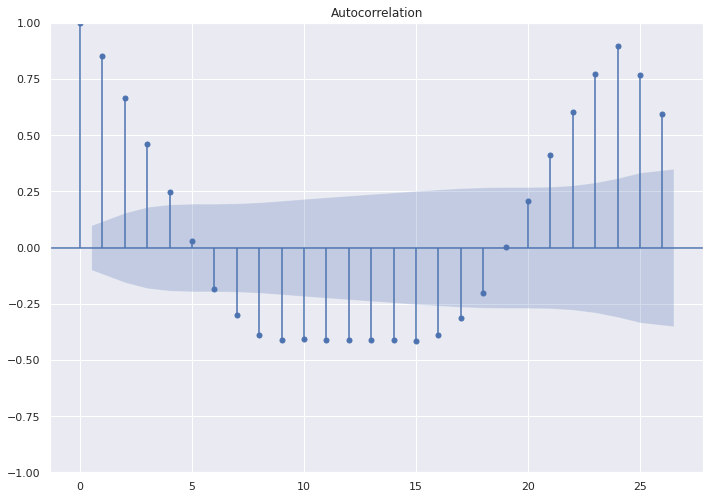

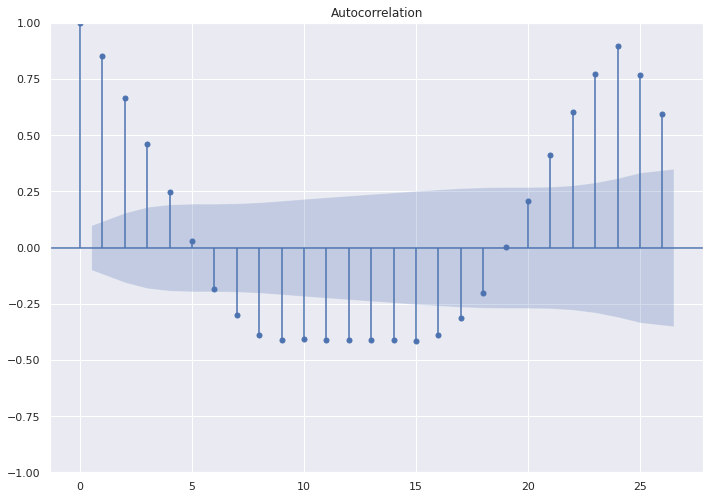

In [91]:
plot_acf(df.price)

In [21]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df.price.dropna())
print('p-value: ',result[1])

result = adfuller(df.price.diff().dropna())
print('p-value: ',result[1])

result = adfuller(df.price.diff().diff().dropna())
print('p-value: ',result[1])


p-value:  0.19614528462036984
p-value:  0.0
p-value:  6.064891275766042e-23


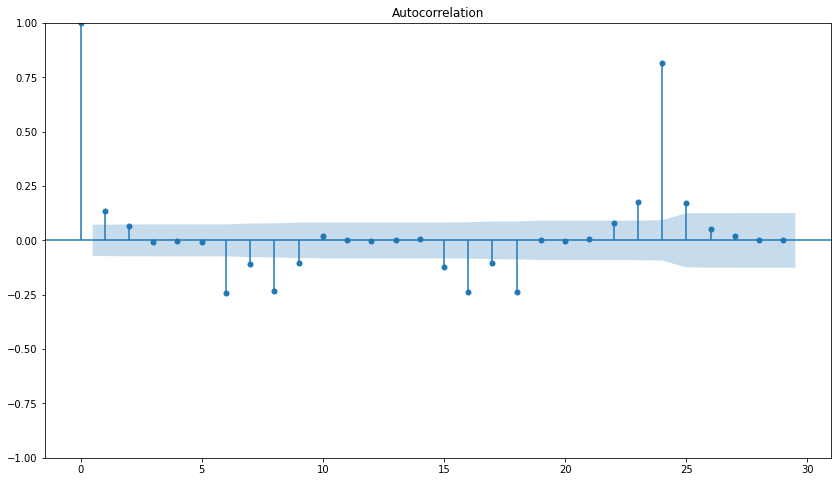

In [24]:
f = plt.figure(figsize=(31,8))
#ax1 = f.add_subplot(122)
#ax1.set_title('1st order')
#ax1.plot(df.price.diff())

ax2 = f.add_subplot(122)
plot_acf(df.price.diff().dropna(),ax=ax2)

plt.show()

In [27]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(df.price,order=(1,2,2))
model = arima_model.fit()
print(model.summary())

/home/denis-root/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/denis-root/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/denis-root/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/denis-root/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/denis-root/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  744
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -5438.976
Date:                Wed, 09 Nov 2022   AIC                          10885.953
Time:                        11:59:55   BIC                          10904.390
Sample:                             0   HQIC                         10893.061
                                - 744                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8073      0.119     -6.762      0.000      -1.041      -0.573
ma.L1         -0.1182      0.097     -1.213      0.225      -0.309       0.073
ma.L2         -0.8817      0.093     -9.510      0.0

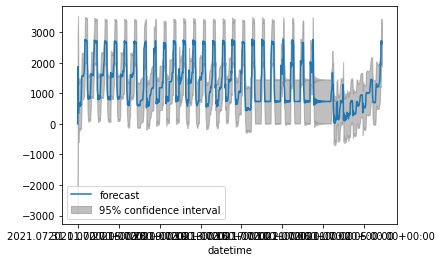

<Figure size 1440x720 with 0 Axes>

In [29]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model, dynamic=False)
plt.figure(figsize=(20,10))
plt.show()


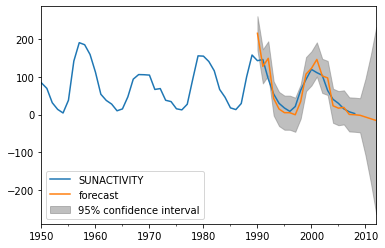

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0


In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA

dta = sm.datasets.sunspots.load_pandas().data[['SUNACTIVITY']]
dta.index = pd.date_range(start='1700', end='2009', freq='A')
res = ARIMA(dta, order=(0,2,0)).fit()
fig, ax = plt.subplots()
ax = dta.loc['1950':].plot(ax=ax)
plot_predict(res, '1990', '2012', ax=ax)
plt.show()
dta.head()

/home/denis-root/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/denis-root/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/denis-root/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


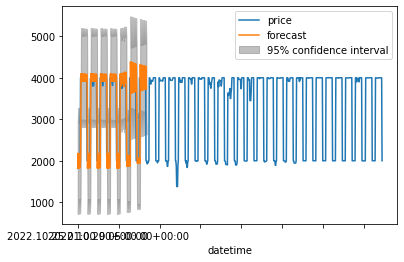

<Figure size 1440x1440 with 0 Axes>

,price
datetime,
2022.10.01 01:00 00+00:00,1999.12
2022.10.01 02:00 00+00:00,1999.20
2022.10.01 03:00 00+00:00,1999.37
2022.10.01 04:00 00+00:00,1980.00
2022.10.01 05:00 00+00:00,1980.00


In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA

dta = pd.read_excel("7th month.xlsx",index_col='datetime',parse_dates=True)
#df = pd.read_excel("7th month.xlsx",index_col='datetime',parse_dates=True)
dta.index.freq='1H'

#dta.index = pd.date_range(start='1700', end='2009', freq='A')
res = ARIMA(dta, order=(1,2,2)).fit()
fig, ax = plt.subplots()
ax = dta.loc['2022.10.01 01:00 c':].plot(ax=ax)
plot_predict(res, start='2022.10.25 01:00 00+00:00', end='2022.10.31 24:00 00+00:00', ax=ax)
plt.figure(figsize=(20,20))
plt.show()
dta.head()